In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [598]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)["0"]
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)["0"]

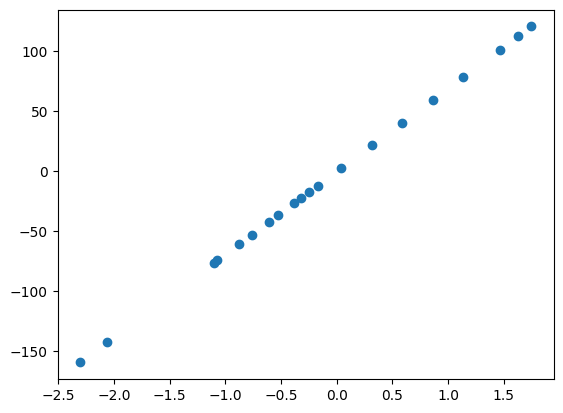

In [599]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [600]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 

    def fit(self, X, Y):  
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
    
    

In [601]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


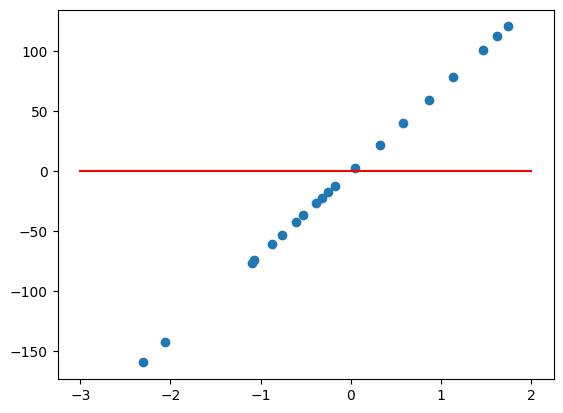

In [602]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [603]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [604]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


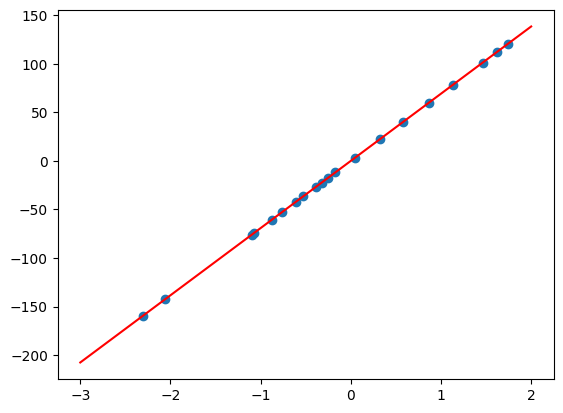

In [605]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

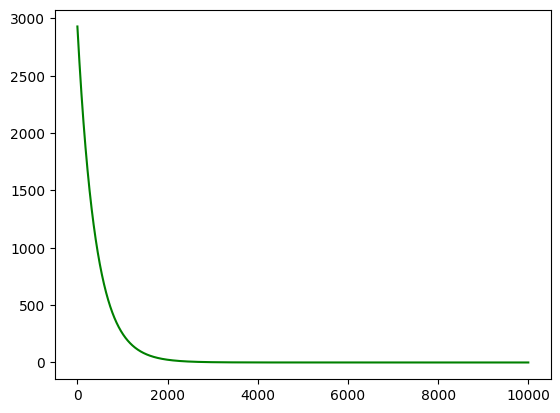

In [606]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# Задание для самостоятельной работы

### 1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [607]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = random.randint(0, 1000)
        self.b1 = random.randint(0, 1000)
        
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [608]:
errors_after_gradient_descent = []
for _ in range(0, 10):
    hyp = Model()
    steps, errors = hyp.fit(x, y)
    errors_after_gradient_descent.append(hyp.error(x, y))

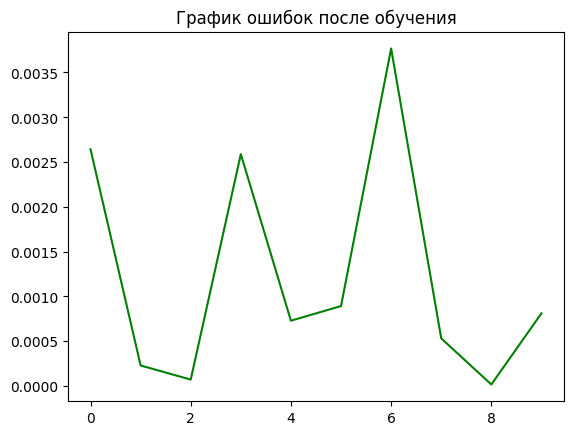

In [609]:
plt.figure()
plt.plot(errors_after_gradient_descent, 'g')
plt.title("График ошибок после обучения")
plt.show()

На графике видно что все ошибки имеют очень маленькие значения, следовательно модель сходится при любых начальных значениях

Ошибка больше чем при b0 = 0 и b1 = 0, но все равно очень маленькая

### 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [610]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [611]:
hyp = Model()
alphas = np.linspace(0.01, 1, 100)
hyp.fit(x, y, alpha=0.001)
errors_after_gradient_descent = [hyp.error(x, y)]
for alpha in alphas:
    hyp = Model()
    hyp.fit(x, y, alpha=alpha)
    current_error = hyp.error(x, y)
    old_error = errors_after_gradient_descent[-1]
    errors_after_gradient_descent.append(current_error)

    if current_error > old_error:
        last_alpha = alpha
        break

print(f"Ошибка начинает расти при alpha = {last_alpha:.4f}")


Ошибка начинает расти при alpha = 0.1800


### 3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [612]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)["0"]

In [613]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def df_to_series(self, X):
        """Функция обработки df"""
        if isinstance(X, pd.DataFrame):
            return X.iloc[:, 0]
        return X
    
    def predict(self, X):
        X = self.df_to_series(X)
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=1, accuracy=0.0001, max_steps=5000):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [614]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 3.0967720910582346e-29


### 4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [615]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def df_to_series(self, X):
        """Функция обработки df"""
        if isinstance(X, pd.DataFrame):
            return X.iloc[:, 0]
        return X
    
    def predict(self, X):
        X = self.df_to_series(X)
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=1, accuracy=0.0001, max_steps=5000):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)
        steps, errors = [1], [self.error(X, Y)]
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            old_err = errors[-1]
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if old_err - new_err < accuracy:
                return steps, errors
        return steps, errors

Добавлен блок if проверяющий разницу ошибок

### 5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [616]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def df_to_series(self, X):
        """Функция обработки df"""
        if isinstance(X, pd.DataFrame):
            return X.iloc[:, 0]
        return X
    
    def predict(self, X):
        X = self.df_to_series(X)
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=1, accuracy=0.0001, max_steps=5000, max_iter = 10000):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)
        steps, errors = [1], [self.error(X, Y)]
        step = 0        
        for _ in range(max_iter):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            old_err = errors[-1]
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if old_err - new_err < accuracy:
                print("Штатный выход из цикла")
                return steps, errors
            
        else:
            print("Закончились итерации")
        return steps, errors

In [617]:
# Модель с неограниченными итерациями
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

# Модель с 5ю итерациями
hyp = Model()
steps, errors = hyp.fit(x, y, max_iter=5)
J = hyp.error(x, y)
print("error after gradient descent:", J)

Штатный выход из цикла
error after gradient descent: 5.994964160459718e-06
Закончились итерации
error after gradient descent: 0.010306924606085436


### 6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [655]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def df_to_series(self, X):
        """Функция обработки df"""
        if isinstance(X, pd.DataFrame):
            return X.iloc[:, 0]
        return X
    
    def predict(self, X):
        X = self.df_to_series(X)
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=1, accuracy=0.0001, max_steps=5000, max_iter=10000):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)
        steps, errors = [1], [self.error(X, Y)]
        step = 0        
        for _ in range(max_iter):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            old_err = errors[-1]
            step += 1            
            steps.append(step)
            
            if new_err > old_err:
                alpha = alpha / 2
                self.__init__()
            
            errors.append(self.error(X, Y))

            if new_err < old_err and old_err - new_err < accuracy:
                print("Штатный выход из цикла")
                return steps, errors
            
        else:
            print("Закончились итерации")
        return steps, errors

Штатный выход из цикла
error after gradient descent: 3.66176770070441e-06


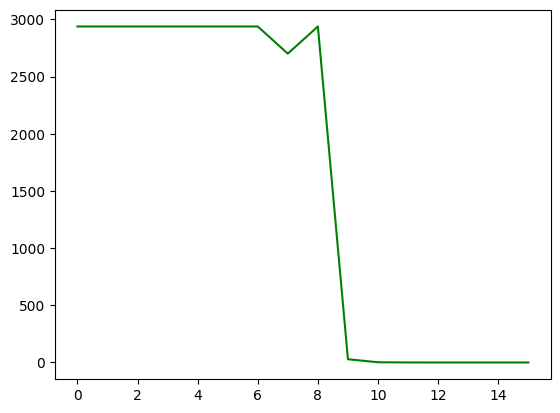

In [658]:
hyp = Model()
steps, errors = hyp.fit(x, y, alpha=100)
J = hyp.error(x, y)
print("error after gradient descent:", J)
plt.figure()
plt.plot(errors, 'g')
plt.show()

### 7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def df_to_series(self, X):
        """Функция обработки df"""
        if isinstance(X, pd.DataFrame):
            return X.iloc[:, 0]
        return X
    
    def predict(self, X):
        X = self.df_to_series(X)
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def graphics(self, X, Y):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)

        steps, errors = self.fit(X, Y)

        X0 = np.linspace(X.min() - 1, X.max() + 1, 100)
        Y0 = self.predict(X0)

        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        axs[0].scatter(X, Y, label='Исходные данные')
        axs[0].plot(X0, Y0, 'r', label='Модель')
        axs[0].set_title('Линейная регрессия')
        axs[0].set_xlabel('X')
        axs[0].set_ylabel('Y')

        axs[1].plot(steps, errors, 'g')
        axs[1].set_title('Изменение ошибки при обучении')
        axs[1].set_xlabel('Шаги')
        axs[1].set_ylabel('Ошибка')

        plt.tight_layout()
        plt.show()

    def fit(self, X, Y, alpha=1, accuracy=0.0001, max_steps=5000, max_iter=10000):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)
        steps, errors = [1], [self.error(X, Y)]
        step = 0        
        for _ in range(max_iter):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            old_err = errors[-1]
            step += 1            
            steps.append(step)
            
            if new_err > old_err:
                alpha = alpha / 2
                self.__init__()
            
            errors.append(self.error(X, Y))

            if new_err < old_err and old_err - new_err < accuracy:
                print("Штатный выход из цикла")
                return steps, errors
            
        else:
            print("Закончились итерации")
        return steps, errors

Штатный выход из цикла


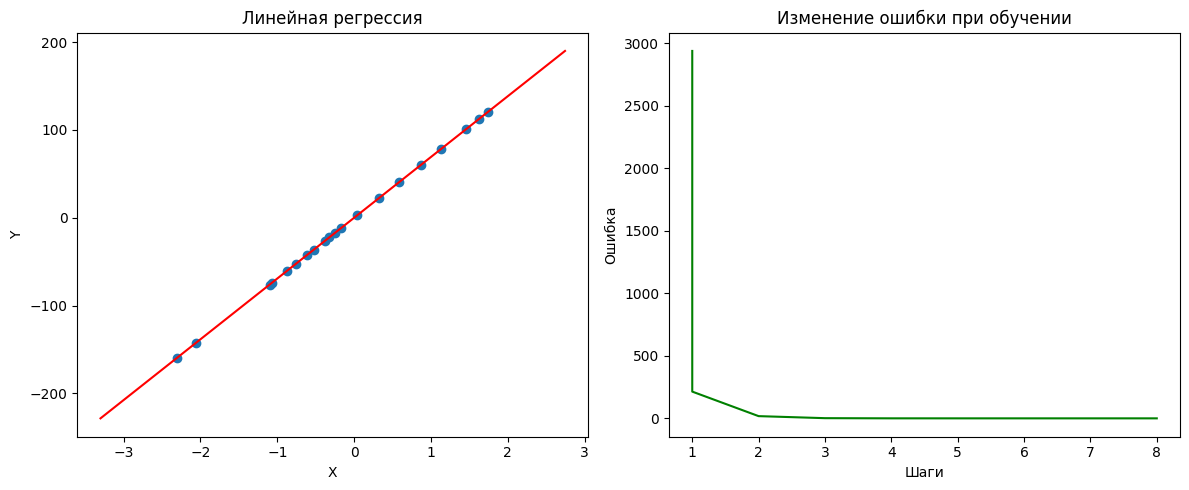

In [662]:
hyp = Model()
hyp.graphics(x, y)

# Дополнительные задания:

### 1. Изучите официальную документацию библиотеки sklearn. Постройте модель регрессии с использованием библиотечных средств на тех же данных. Постройте графики и сравните результаты.

In [674]:
from sklearn.linear_model import LinearRegression

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


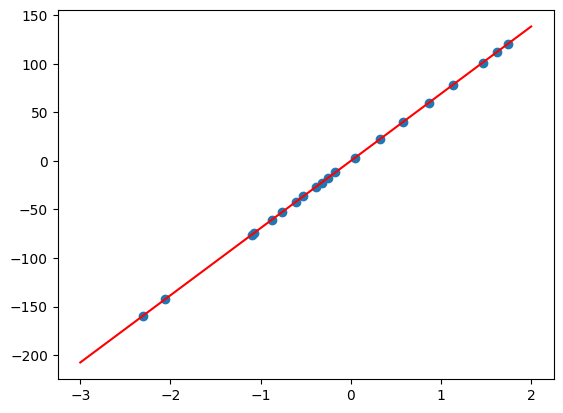

In [678]:
model = LinearRegression()
model.fit(x, y)
X0 = np.linspace(-3, 2, 100).reshape(-1, 1)
Y0 = model.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

### 2. Почитайте в документации про встроенный метод оценки качества регрессии score. Используйте его для оценки качетсва модели. Реализуйте такой же расчет в собственном классе модели.

In [679]:
model.score(x, y)

1.0

Возвращает значение R^2. Данная модель полностью объясняет дисперсию данных

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def df_to_series(self, X):
        """Функция обработки df"""
        if isinstance(X, pd.DataFrame):
            return X.iloc[:, 0]
        return X
    
    def predict(self, X):
        X = self.df_to_series(X)
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def graphics(self, X, Y):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)

        steps, errors = self.fit(X, Y)

        X0 = np.linspace(X.min() - 1, X.max() + 1, 100)
        Y0 = self.predict(X0)

        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        axs[0].scatter(X, Y, label='Исходные данные')
        axs[0].plot(X0, Y0, 'r', label='Модель')
        axs[0].set_title('Линейная регрессия')
        axs[0].set_xlabel('X')
        axs[0].set_ylabel('Y')

        axs[1].plot(steps, errors, 'g')
        axs[1].set_title('Изменение ошибки при обучении')
        axs[1].set_xlabel('Шаги')
        axs[1].set_ylabel('Ошибка')

        plt.tight_layout()
        plt.show()

    def score(self, X, Y):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)

        self.fit(X, Y)
        
        Y_pred = self.predict(X)

        ss_res = np.sum((Y - Y_pred) ** 2)
        ss_tot = np.sum((Y - np.mean(Y)) ** 2)
        return 1 - (ss_res / ss_tot)
    
    def fit(self, X, Y, alpha=1, accuracy=0.0001, max_steps=5000, max_iter=10000):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)
        steps, errors = [1], [self.error(X, Y)]
        step = 0        
        for _ in range(max_iter):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            old_err = errors[-1]
            step += 1            
            steps.append(step)
            
            if new_err > old_err:
                alpha = alpha / 2
                self.__init__()
            
            errors.append(self.error(X, Y))

            if new_err < old_err and old_err - new_err < accuracy:
                print("Штатный выход из цикла")
                return steps, errors
            
        else:
            print("Закончились итерации")
        return steps, errors

In [689]:
hyp = Model()
print(hyp.score(x, y))

Штатный выход из цикла
0.9999999979292536


Реализован метод score возвращающий R^2

### 3. Реализуйте нормирование входных значений. Это нужно делать внутри класса модели. Лучше всего - внутри метода обучения. Необходимо привести значения признаков к шкале [0; 1]. Подумайте, как теперь корректно считать теоретические значения.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def df_to_series(self, X):
        """Функция обработки df"""
        if isinstance(X, pd.DataFrame):
            return X.iloc[:, 0]
        return X
    
    def predict(self, X):
        X = self.df_to_series(X)
        X_norm = (X - self.X_mean) / self.X_std
        return self.b0 + self.b1 * X_norm
    
    def error(self, X, Y):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def graphics(self, X, Y):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)

        steps, errors = self.fit(X, Y)

        X0 = np.linspace(X.min() - 1, X.max() + 1, 100)
        Y0 = self.predict(X0)

        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        axs[0].scatter(X, Y, label='Исходные данные')
        axs[0].plot(X0, Y0, 'r', label='Модель')
        axs[0].set_title('Линейная регрессия')
        axs[0].set_xlabel('X')
        axs[0].set_ylabel('Y')

        axs[1].plot(steps, errors, 'g')
        axs[1].set_title('Изменение ошибки при обучении')
        axs[1].set_xlabel('Шаги')
        axs[1].set_ylabel('Ошибка')

        plt.tight_layout()
        plt.show()

    def score(self, X, Y):
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)

        self.fit(X, Y)
        
        Y_pred = self.predict(X)

        ss_res = np.sum((Y - Y_pred) ** 2)
        ss_tot = np.sum((Y - np.mean(Y)) ** 2)
        return 1 - (ss_res / ss_tot)
    
    def fit(self, X, Y, alpha=1, accuracy=0.0001, max_steps=5000, max_iter=10000): 
        X = self.df_to_series(X)
        Y = self.df_to_series(Y)

        self.X_mean = X.mean()
        self.X_std = X.std()
        X_norm = (X - self.X_mean) / self.X_std

        steps, errors = [1], [self.error(X_norm, Y)]
        step = 0        

        for _ in range(max_iter):
            dJ0 = sum(self.predict(X_norm) - Y) / len(X)
            dJ1 = sum((self.predict(X_norm) - Y) * X_norm) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X_norm, Y)
            old_err = errors[-1]
            step += 1            
            steps.append(step)

            if new_err > old_err:
                alpha = alpha / 2
                self.__init__()  
                self.X_mean = X.mean()
                self.X_std = X.std()
                X_norm = (X - self.X_mean) / self.X_std
                errors.append(self.error(X_norm, Y))
                continue

            errors.append(new_err)

            if old_err - new_err < accuracy:
                print("Штатный выход из цикла")
                return steps, errors
            
        else:
            print("Закончились итерации")
        return steps, errors


Штатный выход из цикла


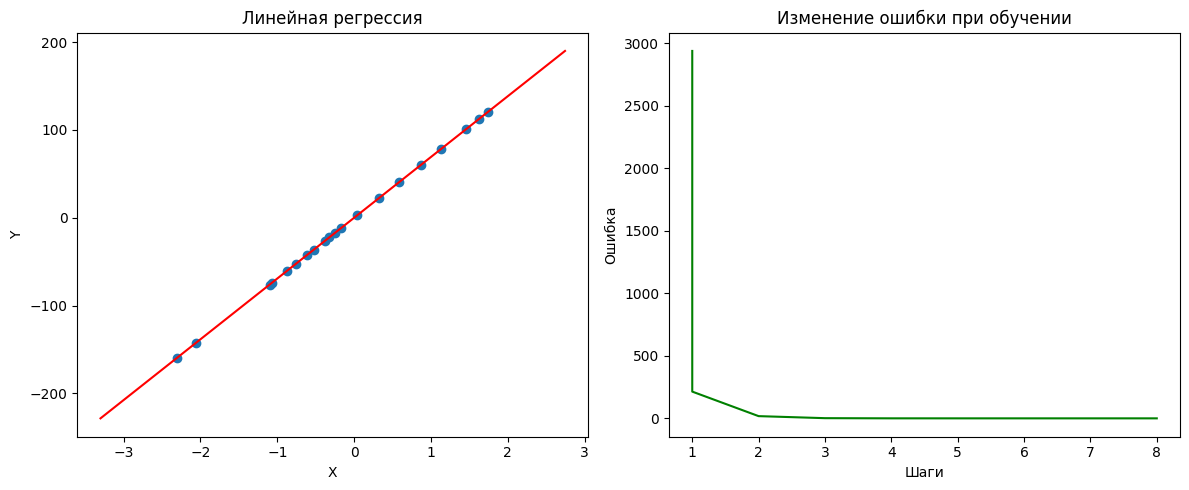

In [699]:
hyp = Model()
hyp.graphics(x, y)

На графике видно что модель успешно обучилась с учетом нормализации данных

# Контрольные вопросы

### 1. Сформулируйте, в чем состоит задача регрессии, придумайте несколько примеров.
        Предсказание численного значения по входным данным
### 2. Что такое метод градиентного спуска?
        Метод оптимизации, уменьшающий ошибку путём корректировки параметров модели в направлении градиента.
### 3. Что такое скорость обучения в методе градиентного спуска?
        Параметр, определяющий размер шага при обновлении весов (b0, b1). Влияет на скорость и стабильность обучения.
### 4. Какие функции ошибки используются в регрессионных моделях и почему именно такие?
        MSE — чувствительна к выбросам, MAE — устойчива. Используются из-за простоты вычисления и хорошей сходимости.
### 5. Что показывает конкретное значение ошибки регрессии?
        Среднее отклонение предсказаний от факта. Чем меньше, тем точнее модель.
### 6. Что показывает график обучения и зачем его строить?
        Динамику ошибки во времени. Помогает понять, сходит ли модель и насколько хорошо обучается.